<br>
<br>    
<br>    
<br>    
<br>   
 

#  PageRank and Random Walks in a Graph Network 
_______________
 *By Rachel Mattson  
 Math 3300 Spring 2020  
 Applied Linear Algebra  
 Dr. Toyin Allí  
 06 May 2020*  
 

   
<br>    
<br>    
<br>   
<br>   
<br>
<br>    
<br>    
<br>    
<br>   



This report is my own work. Any help, insight, or aid that we have received is explicitly acknowledged. To do otherwise is plagiarism, and I understand that I will receive a zero on this report if it is found that I did not adequately acknowledge the contribution of anybody else.





______



## Introduction




Growing up surrounded by the internet, I learned to imagine it as solid architecture. Websites were castles with different rooms to click through. Search engines showed you doors leading to where you wanted to go; select the right one and move through it.  The internet was a continuous space, where related websites naturally existed next to each other. 

<img src="img/castle.png" width="500">

I couldn't stand my father’s explanation of the internet: a “server sitting in our basement talking to other servers”. How could such a solid kingdom arise from a patchwork of machines spitting data at each other? This intuitive space is created by search engines which skillfully present related content side by side. Behind the scenes, these engines model connections between websites as large network (well, a world wide web), often represented as matrices. This allows a real-world problem to emerge from linear algebra calculations. 





For instance, Google’s foundational algorithm, PageRank, relies on a matrix encoding the probability of moving from one website to another. These matrices have special properties that allows one to calculate which pages might be most “important”. As you might imagine from the pages of results from each google search, the matrices to search are huge, calling for special mathematical solutions to search the space. PageRank’s solution relies on a **random walk** to discover the most important sites. In this paper, we will observe how Google’s algorithm functions, then explore more generalized theory about random walks in graph networks. We will end by investigating further applications of this mathematical tool.

### Building PageRank

While there are scholarly articles outlining this algorithm, secondhand sources provide a better understanding at the level of an undergraduate. This section relies on textbook sources (Margalit, 2019), knowledge from lecture (Allí, 2020), and a series of blog posts from a Google employee (Kun, 2011).

#### A Special Matrix

PageRank models the internet as a state that undergoes constant changes over time.At its heart is the assumption that $V_t = AV_{t-1}$, where changes between one state, $V_{t-1}$, and the next, $V_t$, are related through the matrix $A$. This is called the difference equation. $A$ also has a special title, a stochastic matrix (SM), and special properties. For each j website in a model, the jth columns of a SM encode the probability that the site links to another. As such, in an SM "all of its entries are nonnegative, and the entries of each column sum to 1" (Margalit, 2019).

Matrices that meet these requirements have $\lambda$ = 1 in their eigenvalues, with all other $\lambda$s between -1 and 1.

A SM is printed below using some handy python tools. Each column sums to one. 

In [3]:
data = pd.DataFrame([[1/3, 1/3, 1/3],[1/4, 2/4, 1/4],[3/7, 2/7, 2/7]]) # input a 2d array
print(data.T) # format as matrix

          0     1         2
0  0.333333  0.25  0.428571
1  0.333333  0.50  0.285714
2  0.333333  0.25  0.285714


The relationships in this matrix can be seen on a graph like as below, where the blue nodes represent websites and the arrows show the "weights" between them. For example, the line from node 0 to 2 represents that page 0 links to page 2, 33% of the time. Conversely, page 2 links to page 0, 42% of the time. Note that the graph does not show an arrow to reflect the probability that a page "links to itself", a real possibility in the given matrix.


 Graph :



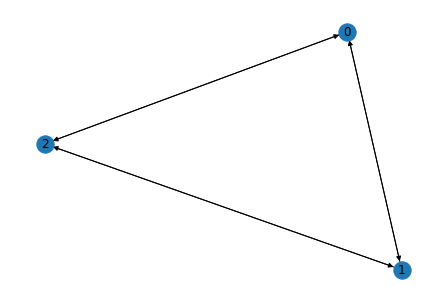

In [4]:
buildGraph(data)

So ultimately we model a real world system as the rows and columns of a matrix. Capturing relationships between websites doesn't help by itself; a search engine needs a ranking. We want to map websites to a single line, a list. So how can we transform a n-dimensional matrix into a 1-dimensional vector that captures the "most important" sites?

#### Linear Algebra Points to a Desired Distribution
We can answer this question using the Perron–Frobenius Theorem, which states:

*If $A$ is positive stochastic matrix, then $A$ admits the unique steady state vector $w$, that spans the 1-eigenspace. (ILA)*

The steady state vector is a long-term distribution reached by applying the SM transformation to any starting state. It can be thought of as the theoretical distribution of which links are clicked from each website. As such, it captures a measure of "importance" for each website.

The eigenvector associated with $\lambda = 1 $ **is** the steady state. And it maps all the components of the state matrix to a line.

So by solving for $(A - I_n)v = 0$ and normalizing the resulting eigenvector, we can find the steady state in a purely theoretical manner.

#### Theory isn't Enough

It's nice to know that there is a perfect long-term solution to the ranking problem, but solving for a 1-Eigenvector doesn't give us enough understand to build a ranking algorithm for several reasons. The two we will examine are:
- Huge internet to model makes solving $(A - I_n)v = 0$ computationally difficult. 
- Theory constraints don't reflect messy, real-world networks. 

The first issue can be addressed by another stipulation of the Perron–Frobenius Theorem:

*For any vector $V_0$ with entries summing to sum number c, the iterates*
$V_1 = AV_0, V_2 = AV_1, ... V_t = AV_{t-1},...$ 
*approach $cw$ as t gets large*
(Margalit, 2019).

Here, we see that we can approximate the steady state vector by repeated multiplication of the stochastic matrix. This **converges** on the steady state. The repeated multiplication can be made computationally cheaper though additional tricks such as diagonalizing $A$ (Allí, 2020).

The second issue is that the Perron–Frobenius Theorem requires matrices to be non-bipartite, meaning there are no partitions in the network. All webpages would have to be indirectly connected to eachother to satisfy this, which does not reflect the reality of closed off loops in the internet. Furthermore, all columns of the stochastic matrix must sum to 1, which would require all webpages to lead to at least 1 other webpage. 


Google employee Jeremy Kun refers to these two data issues as "dangling nodes and disconnected subwebs"(Kun, 2011). We can see  both present in the matrix below:

In [5]:
# input a 2d array
dirtydata = pd.DataFrame([[1/3,2/3,0, 0, 0, 0],[.25,3/4,0, 0, 0, 0],[0 ,0, 1/7, 2/7,2/7,2/7],[0,0,5/10,2/10,3/10,0],[0,0,4/10,2/10,3/10,1/10],[0,0,0,0,0,0]])

# format as matrix
print("Matrix 2 : \n",dirtydata.T)

Matrix 2 : 
           0     1         2    3    4    5
0  0.333333  0.25  0.000000  0.0  0.0  0.0
1  0.666667  0.75  0.000000  0.0  0.0  0.0
2  0.000000  0.00  0.142857  0.5  0.4  0.0
3  0.000000  0.00  0.285714  0.2  0.2  0.0
4  0.000000  0.00  0.285714  0.3  0.3  0.0
5  0.000000  0.00  0.285714  0.0  0.1  0.0


First off, the 5th column shows a 0% probability of that the 5th node will lead to any other websites. Secondly, no other websites link to the 0th and 1st entries; those nodes are completely isolated. This results in a network like below.


 Graph 2 :



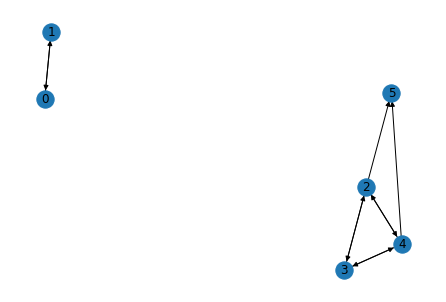

In [6]:
# output graph
buildGraph(dirtydata, "Graph 2")

There is a solution to both problems through adjusting the matrix, but to understand why it works, its helpful to view the search algorithm through the lense of a random walk.  

#### Wandering Takes You to the Right Place

So far we've looked at how an individual states evolves to reflect a longterm state. 

But picture again the network as a graph with the values of the stochastic matrices as edge weights connecting each node. If an agent were to travel from node to node, the edge weight could reflect the probability that the agent chose to travel to one subsequent node over another (Kun, 2011).

The agent would find itself returning to nodes it had visited, given enough time. Since more "important" nodes would logically have more paths to them (and higher weighted paths), ranking the nodes by frequency of a visit would yield a list of the most important nodes. In fact, this list is equivalent to the steady state distribution. 

But what if the agent travels to a node that has no further edges? If it call's quits, it might miss out on fully exploring the graph. A better idea is that if the agent arrives at a dead end, it "hops" over to another node. By creating the option to hop to any node on the graph with equal probability, we have a way of getting out of dead ends. Significantly, this hop solves the problem of isolated subwebs. Now a disconnected subweb could be reached any time an agent hops to a random node. 

In [7]:
dirtydata.T[5] = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6] # fill last col with 1/6
print("Adjusted Matrix 2: \n", dirtydata.T)

Adjusted Matrix 2: 
           0     1         2    3    4         5
0  0.333333  0.25  0.000000  0.0  0.0  0.166667
1  0.666667  0.75  0.000000  0.0  0.0  0.166667
2  0.000000  0.00  0.142857  0.5  0.4  0.166667
3  0.000000  0.00  0.285714  0.2  0.2  0.166667
4  0.000000  0.00  0.285714  0.3  0.3  0.166667
5  0.000000  0.00  0.285714  0.0  0.1  0.166667


This change is reflected in the matrix by simply filling $\vec{0}$ columns with 1 divided by the size of the column. In the above example, this alters our matrix by filling column number 5 with the value 1/6. Now the fifth column provides an equally likely path to columns 0-4. See how the graph below reflects the new connections.


 Adjusted Graph 2 :



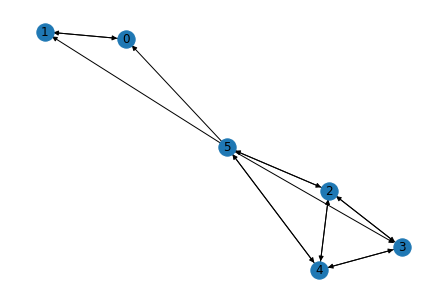

In [8]:
buildGraph(dirtydata, "Adjusted Graph 2")

Hopefully this has outlined some of the key components of PageRank. This model is nice because we don't need a good assumption for the original state. Any guess will 
point us towards the longterm answer. But this also means that the stochastic matrix is 
pretty useless when examined in the shorterm. The best explanation I found for how aggregated randomness leads to order is found in Cédric Villani's [lecture on the appeal of math](https://www.ted.com/talks/cedric_villani_what_s_so_sexy_about_math/transcript?language=en) (Villani, 2016). The speaker uses great verbal and visual imagery.

### Looking broader

The study of random walks is much larger than its applications to search engines. For example, PageRank network weights are directed, while other graphs may have "undirected" or symmetric graphs. The algorithm we have explored is only a subset of a greater field.


*Random Walks on a Graph: A Survey* gives a great introduction to the breadth of the subject (Lovász, 1993). There are two main areas: random walks on **infinite graphs**, and random walks on **finite graphs**. The former has theoretical consequenses on the latter, but is limited to pure mathematical study. Questions about finite grids easily translate to the real world, and can be answered with empirical results. I would also assume that finite grids are in high interest because of practical applications that have made recent tech pioneers quite rich. 

Random walks have other attributes than a tendency to reach a steady state. Lovasz defines these as:

- Access time, "the expected number of steps before node j is visited, starting from node i
- Commute time, a measure of reaching j and returning to i
- Cover Time, the "expected number of steps to reach each node"
- Mixing rate, "a measure of how fast a random walk converges to its limiting distribution" (Lovasz, 1993) 


Mixing rate appears to be significantly in recent literature; this makes sense as decreasing it would make search algorthims more powerful. Numerous studies such as (Boyd, 2006) seek to optimize mixing rate by "exploiting" graph structure. 

#### Random Walks are Markov Chains

Markov Chains are a popular concept in computer science. Random Walks and Markov Chains have strong duality, with different terminology referencing the same concept. Lovasz notes that "time-reversible Markov chains can be viewed as random walks on undirected graphs, and symmetric Markov chains, as random walks on regular symmetric graphs" (Lovász, 1993).

Viewing random walks as Markov Chains can emphasize the "stickyness" (tendency to look like a pattern) of random decision making, as Victor Powell explores in a fabulously <a href="https://setosa.io/blog/2014/07/26/markov-chains/index.html">interactive blog</a>
(Powell, 2014).

But overall, studies on Markov Chains have direct significance on Random Walks.

#### Random Walks Aid Spectral Analysis

Spectral clustering is a field of study that uses the properties of special graphs, called Laplacians, to find clusters that are not easy to identify in normal graphs. 

Random walks help explain why the Laplacian matrices are such a useful representation. The background to this is a little out of the scope of this paper, but has to do with the intuitive properties of the walk that we have already explored. In his comprehensive tutorial on spectral clustering, Luxburg asserts that "a random walk stays long within the same cluster and seldom jumps between clusters" (Luxburg, 2007). This gives a means to cut the graph at locations where transitions are rarely made, identifying clusters.

______
## Research Project Proposal
Title : Impact of Graph Connectedness in Spectral Clustering Scenarios  
    With Dr. Shannon Quinn  
    Department of Computer Science, UGA
    
Background: Luxburg's "Tutorial on Spectral Clustering" outlines three key similarity graphs that model local neighborhood relationships: $\epsilon$-neighborhood, $k$-nearest neighbor, and fully connected graphs. These can be used to construct related graph Laplacians which in turn have useful clustering properties. The impact of similarity graph choice seems to depend on how well they model real world attributes of data and requires a good fit between graph and scenario. This project will explore the effect of graph choice on clustering results using well-defined, existing datasets. Success metrics will reflect on the fit between type of dataset and graph.
   
Question:
How does graph connectedness impact spectral clustering in different datasets?
 
Methodology: This project will lean heavily on linear algebra theory such as matrix diagonization and multiplication, as well as performance metrics from the field of machine learning. Markov chain theory may especially shed insight on behavior caused by incomplete data-sets. Work will be implemented in python scripts executed on local or university machines. 

Schedule: 
- 4 hours per week for literature review
- 6 hours per week for coding
- 2 hours a week for write-ups
    
______


## Conclusion

Google's PageRank algorithm is founded on on linear algebra principles, and it can be intuitively understood through the idea of a random walk. Random walks, closely tied with Markov chains, have properties extending beyond ranking algorithms. Their interpretation of spectral clustering techniques could help in research that explores how graph connectedness impacts spectral clustering in different datasets. 

The theory behind random walks is vast; in no way was it all covered here. I am still awed by the wealth of information, but this very topic puts me at easy while I explore. I don't have to memorize an entire set of publishings. Instead I can relax and wander through information. With a click here, a paragraphs there, and enough time on my hands, I know I will return to the important stuff. 

# References

1. Margalit, D., & Rabinoff, J. (2019, June 3). Interactive Linear Algebra. Retrieved from https://textbooks.math.gatech.edu/ila/stochastic-matrices.html
2. Allí, Toyin.(2020) Applied Linear Algebra: In Class Notes. Retrieved from https://uga.view.usg.edu/d2l/le/content/1983513/Home 
3. Kun, Jeremy. (2011, June 23). Google's PageRank – Introduction. Retrieved from https://jeremykun.com/2011/06/12/googles-pagerank-introduction/
4. Villani, C. (2016). Transcript of "What's so sexy about math?". Retrieved from https://www.ted.com/talks/cedric_villani_what_s_so_sexy_about_math/transcript?language=en
5. Lovász, L. (1993). Random Walks on Graphs: A Survey. Retrieved from http://web.cs.elte.hu/~lovasz/erdos.pdf
6. Boyd, S. (2006, December 6).Fastest Mixing Markov Chain on Graphs with Symmetries. Retrieved from https://web.stanford.edu/~boyd/papers/pdf/fast_mix_symm.pdf
7. Powell, V., & Lehe, L. (2014, July 26). Markov Chains. Retrieved from https://setosa.io/blog/2014/07/26/markov-chains/index.html
8. Luxburg, von, & Ulrike. (2007, November 1). A Tutorial on Spectral Clustering. Retrieved from https://arxiv.org/abs/0711.0189

#  Supporting Code

In [1]:
# using well known python libraries

import numpy as np # array tools 
import matplotlib.pyplot as plt # visualization
import pandas as pd # array tools
import networkx as nx # graph building

In [2]:
# constructs and builds graph using matrix specified
def buildGraph(data, s="Graph"):
    graph = nx.DiGraph() # directed graph
    for i in range(len(data)):
        graph.add_node(i) # build nodes
        for j in range(len(data[i])):
            if (data[i][j] >= .00001): # if weight is not ~0
                # construct edge
                graph.add_edge(j, i, weight = data[i][j])         
    nx.draw(graph, with_labels = True)
    print ("\n",s, ":\n") # output with title
    plt.show()